## Načteme si potřebné knihovny

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, KBinsDiscretizer, StandardScaler
from sklearn.compose import ColumnTransformer

pd.set_option('display.float_format', lambda x: '%.0f' % x)

## Načtení dat do DataFrame

Ze souboru `spotify-2023.csv` umístěném ve stejném adresáři načteme data a vytvoříme Pandas DataFrame.


In [2]:
df = pd.read_csv("spotify-2023.csv", encoding="utf-8", encoding_errors="ignore")
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Zkoumání jednotlivých atributů datové sady

In [3]:
# Zkoumáme datový typ jednotlivých sloupců
data_types = df.dtypes
data_types
# df.info()

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

### Z výpisu typů jednotlivých atributů vidíme, že `streams`, `in_deezer_playlists` a `in_shazam_charts` jsou typu object. Tyto atributy bychom chtěli převést na číslo a odstranit nevhodné řádky

In [4]:
df['streams'] = pd.to_numeric(df['streams'].replace({',': ''}, regex=True), errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].replace({',': ''}, regex=True), errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'].replace({',': ''}, regex=True), errors='coerce')

data_types = df.dtypes
data_types

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [5]:
# Zkoumáme počet hodnot v jednotlivých sloupcích
distinct_values = df.nunique()
distinct_values

track_name              942
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 948
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [6]:
# Zkoumáme nejčastější hodnoty v jednotlivých sloupcích
most_occuring_values = df.mode().iloc[0]
most_occuring_values
# include = ['object', 'float', 'int']
# df.describe(include=include)

track_name                          
artist(s)_name          Taylor Swift
artist_count                       1
released_year                   2022
released_month                     1
released_day                       1
in_spotify_playlists              86
in_spotify_charts                  0
streams                    156338624
in_apple_playlists                 0
in_apple_charts                    0
in_deezer_playlists                0
in_deezer_charts                   0
in_shazam_charts                   0
bpm                              120
key                               C#
mode                           Major
danceability_%                    70
valence_%                         24
energy_%                          74
acousticness_%                     0
instrumentalness_%                 0
liveness_%                        11
speechiness_%                      4
Name: 0, dtype: object

In [7]:
# Zkoumáme rozsah hodnot v jednotlivých sloupcích
value_ranges = df.describe().loc[['min', '50%', 'max']]
value_ranges

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
min,1,1930,1,1,31,0,2762,0,0,0,0,0,65,23,4,9,0,0,3,2
50%,1,2022,6,13,2224,3,290530915,34,38,44,0,2,121,69,51,66,18,0,12,6
max,8,2023,12,31,52898,147,3703895074,672,275,12367,58,1451,206,96,97,97,97,91,97,64


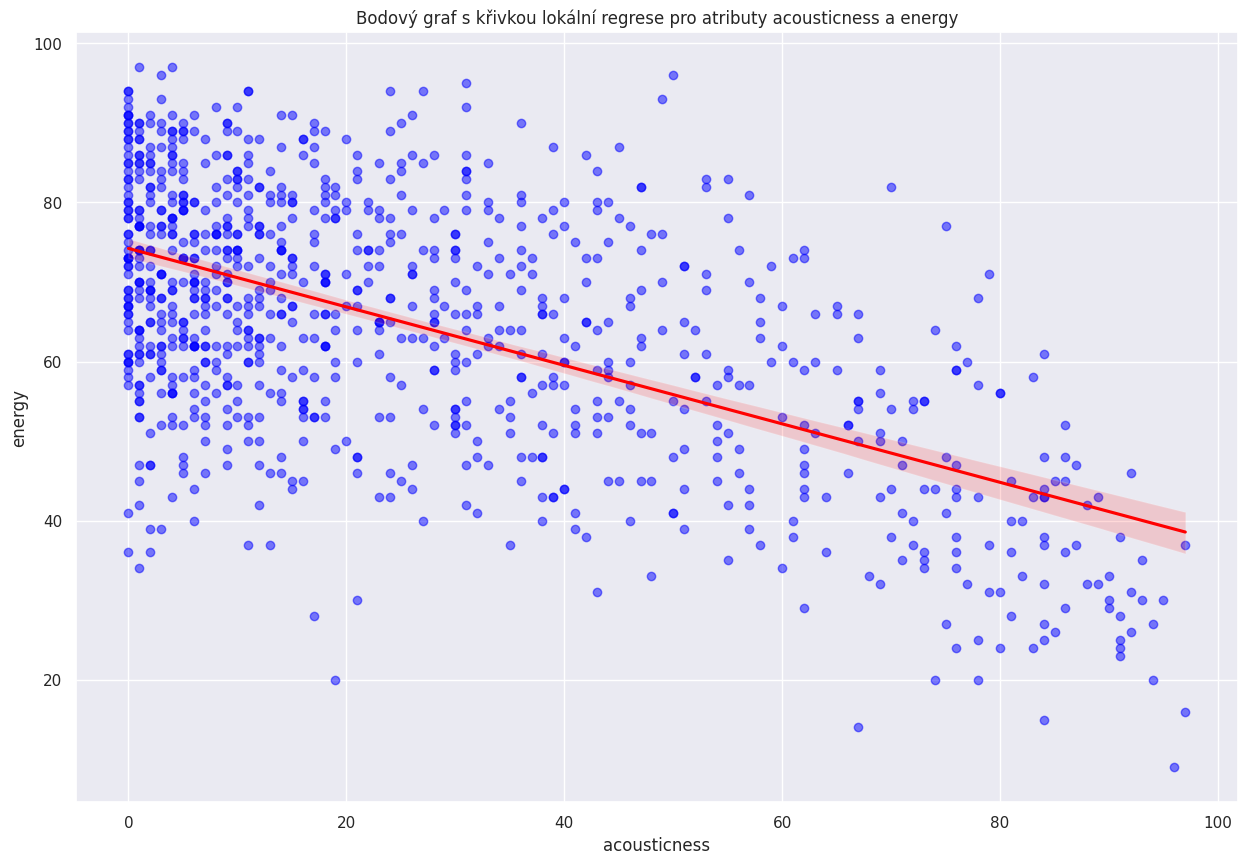

In [37]:
y_attribute = 'energy_%'
x_attribute = 'acousticness_%'

plt.figure(figsize=(15, 10))
sns.regplot(x=x_attribute, y=y_attribute, data=df, scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title(f'Bodový graf s křivkou lokální regrese pro atributy acousticness a energy')
plt.xlabel('acousticness')
plt.ylabel('energy')
plt.show()


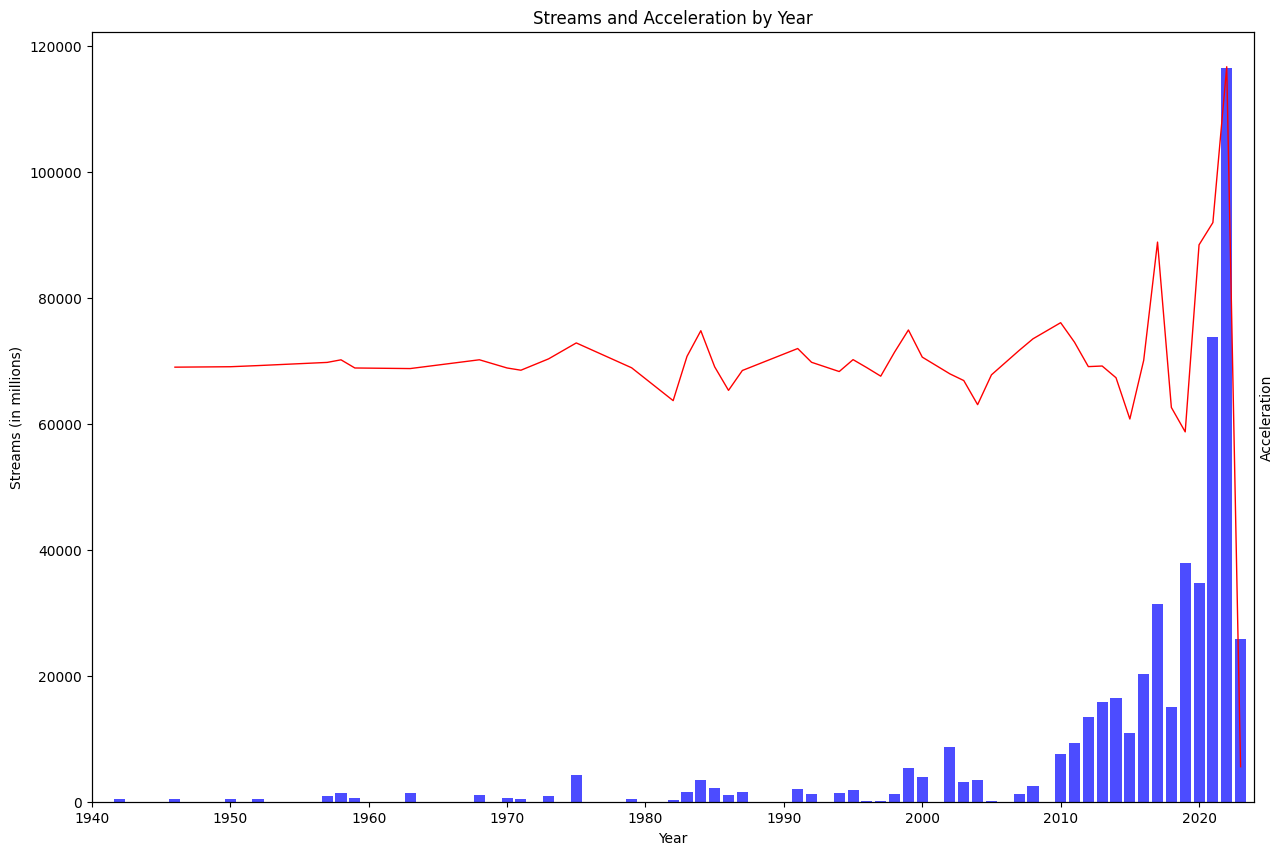

In [9]:
# Group by released year and calculate the sum of streams
df_grouped = df.groupby(['released_year'])['streams'].sum().reset_index()

window_size = 1 # You can adjust this value based on your preference
#y_smoothed = df_grouped['streams'].rolling(window=window_size, center=True).mean()
y_smoothed = df_grouped['streams'].rolling(window=window_size, center=False).mean()


# Calculate the second derivative (acceleration) of smoothed streams with respect to year
y_acceleration = np.gradient(np.gradient(y_smoothed))

plt.figure(figsize=(15, 10))

# # Plot for Streams
plt.bar(df_grouped['released_year'], df_grouped['streams']/10**6, color='blue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Streams (in millions)')

# Create a secondary y-axis for acceleration
ax2 = plt.gca().twinx()
ax2.plot(df_grouped['released_year'][2:], y_acceleration[0:-2], color='red', label='Acceleration', linewidth=1, alpha=1)
ax2.set_ylabel('Acceleration')
ax2.set_yticks([])

ax2.grid(False)

# Combine legends for both plots
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.xlim(1940, 2024)
plt.title('Streams and Acceleration by Year')
plt.show()

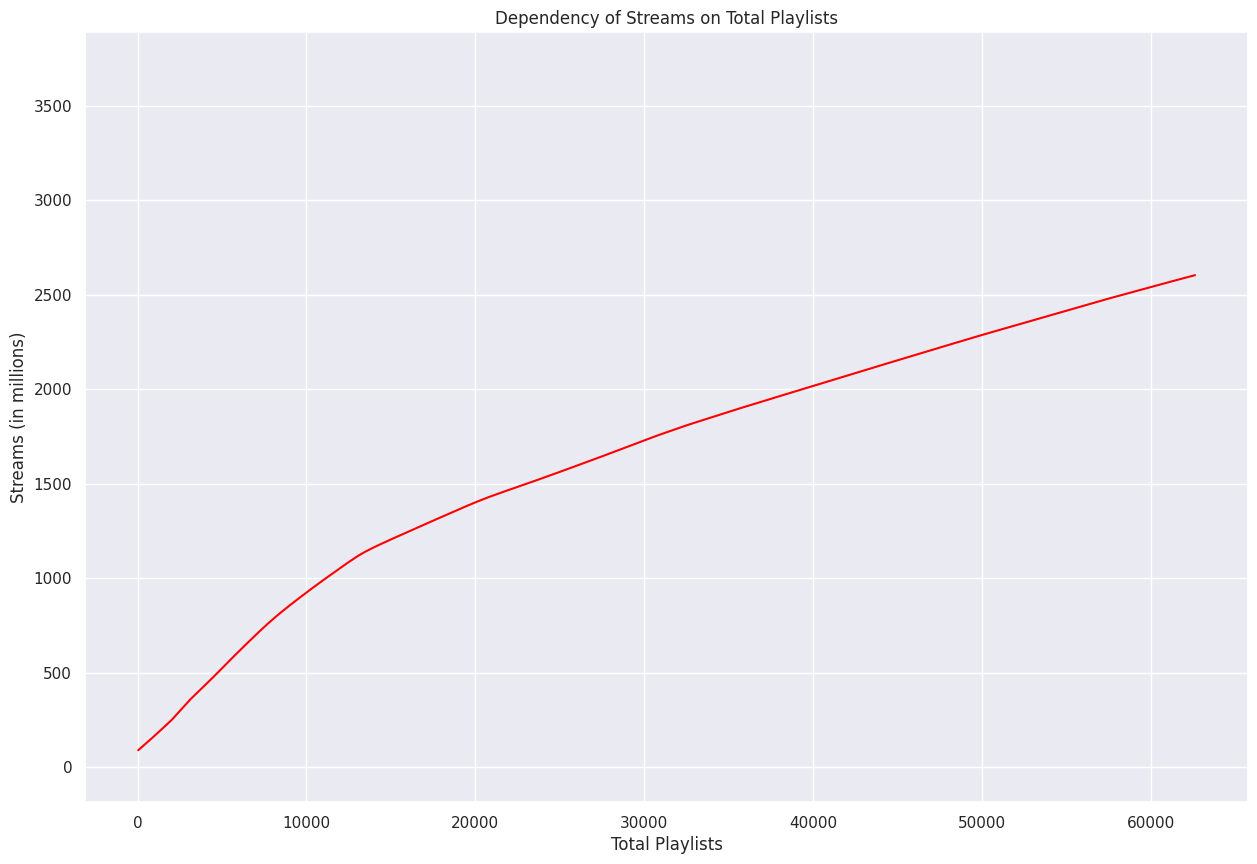

In [34]:
df['played'] = df['in_spotify_playlists'] + df['in_deezer_playlists'] + df['in_apple_playlists']

df['streams_millions'] = df['streams']/10**6

plt.figure(figsize=(15, 10))

sns.set(style="darkgrid")

sns.scatterplot(x='played', y='streams_millions', data=df, alpha=0.7, marker='')

lowess = sm.nonparametric.lowess
smoothed = lowess(df['streams_millions'], df['played'])
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Local Regression')

plt.xlabel('Total Playlists')
plt.ylabel('Streams (in millions)')
plt.title('Dependency of Streams on Total Playlists')

plt.show()

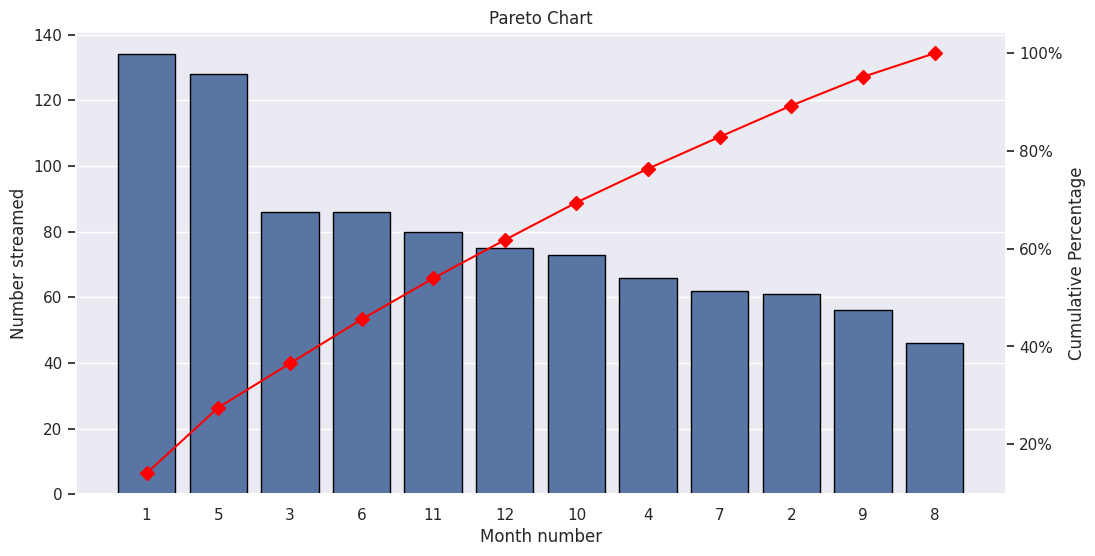

In [11]:
monthly_songs = df['released_month'].value_counts().reset_index()
monthly_songs.columns = ['released_month', 'num_songs']

monthly_songs = monthly_songs.sort_values(by='num_songs', ascending=False)

month_order = monthly_songs['released_month'].tolist()
df.loc[:, 'released_month_cat'] = pd.Categorical(df['released_month'], categories=month_order, ordered=True)

monthly_songs = df['released_month_cat'].value_counts().reset_index()
monthly_songs.columns = ['released_month', 'num_songs']

monthly_songs = monthly_songs.sort_values(by='released_month')

monthly_songs["cum_percentage"] = round(monthly_songs["num_songs"].cumsum()/monthly_songs["num_songs"].sum()*100,2)

fig, ax = plt.subplots(figsize=(12,6))

# Plot bars (i.e. frequencies)
sns.barplot(x='released_month', y='num_songs', data=monthly_songs, edgecolor='black')
ax.set_title("Pareto Chart")
ax.set_xlabel("Month number")
ax.set_ylabel("Number streamed")

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(range(0,12), monthly_songs['cum_percentage'], color="red", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage")

ax2.grid(False)

plt.show()

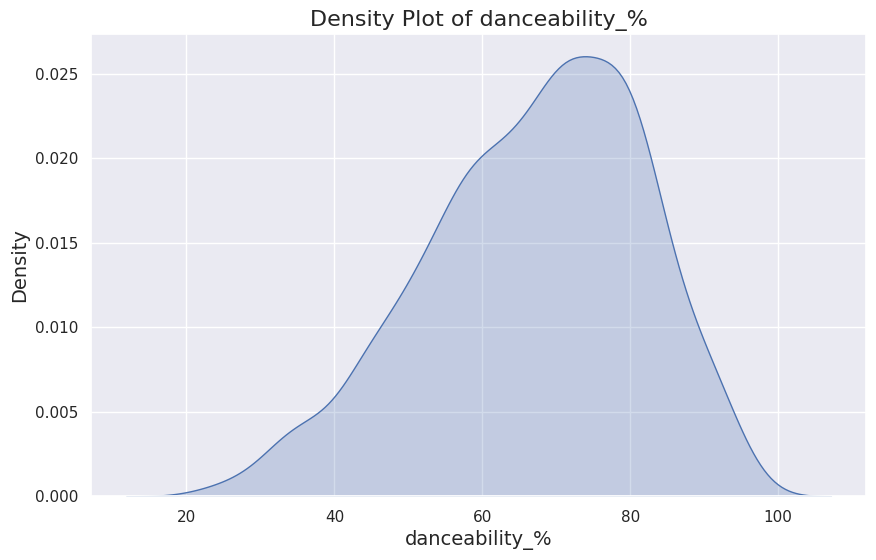

In [12]:
attribute_name = 'danceability_%'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Use Seaborn's kdeplot to create a density plot
sns.kdeplot(data=df[attribute_name], fill=True, ax=ax)

# Set the title and labels
ax.set_title(f'Density Plot of {attribute_name}', fontsize=16)
ax.set_xlabel(attribute_name, fontsize=14)
ax.set_ylabel('Density', fontsize=14)

# Display the plot
plt.show()

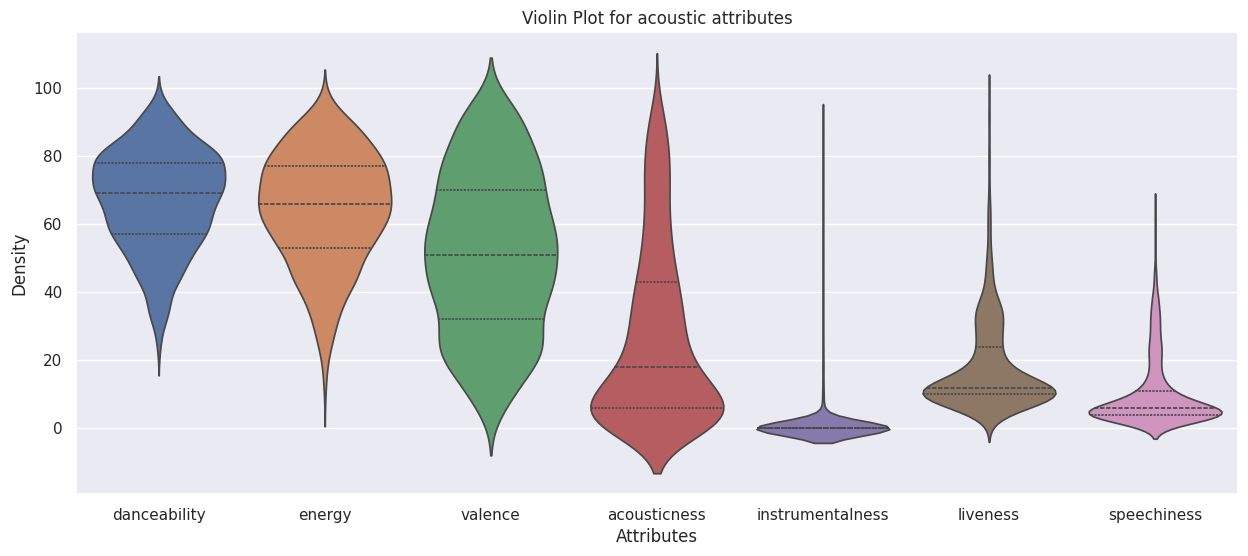

In [13]:
selected_columns = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Create a new DataFrame with selected columns
df_selected = df[selected_columns]

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Create a violin plot using seaborn
sns.violinplot(data=df_selected, inner="quartile")

# Set plot labels and title
plt.title('Violin Plot for acoustic attributes')
plt.xlabel('Attributes')
plt.ylabel('Density')
plt.xticks([0,1,2,3,4,5,6],['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness'])

# Show the plot
plt.show()

### Zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty

In [14]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
played                   0
streams_millions         1
released_month_cat       0
dtype: int64

In [15]:
empty_track_name = df['track_name'] == ''
rows_with_empty_values = df[empty_track_name]

print(f"track name missing in {len(rows_with_empty_values)} rows")

track name missing in 2 rows


### Proveďte podrobnou analýzu chybějící hodnot

In [16]:
empty_key = df['key'].isna()
empty_shazam_chart = df['in_shazam_charts'].isna()
empty_track_name_new = df['track_name'] == ''
zero_streams = df['streams'].isna()

rows_with_invalid_values = df[empty_key| empty_shazam_chart | empty_track_name_new | zero_streams]
rows_with_invalid_values

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,played,streams_millions,released_month_cat
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,71,65,68,6,0,3,7,13256,1317,1
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,52,66,73,34,0,31,6,24841,2513,3
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,44,14,9,96,0,10,3,1048,31,7
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,48,44,42,12,2,11,3,13465,1297,1
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,...,81,63,68,11,0,11,4,1206,123,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,After LIKE,IVE,1,2022,8,22,767,12,265548837,20,...,68,80,92,10,0,9,12,798,266,8
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,244585109,102,...,74,71,89,24,61,15,5,5368,245,6
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins",2,2020,12,18,668,1,140430339,0,...,49,13,74,0,0,9,4,699,140,12
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,187339835,6,...,48,15,31,80,22,12,4,1618,187,10


In [17]:
rows_with_more_invalid_values = df[(empty_key & empty_shazam_chart) | (empty_key & empty_track_name) | (empty_key & zero_streams) | (empty_shazam_chart & empty_track_name_new) | (empty_shazam_chart & zero_streams) | (empty_track_name_new & zero_streams)]
rows_with_more_invalid_values

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,played,streams_millions,released_month_cat
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2322580122,437,...,55,56,82,12,0,34,5,23564,2323,11
395,Space Song,Beach House,1,2015,1,1,17852,4,789753877,69,...,51,62,79,22,13,14,3,18256,790,1
504,Out of Time,The Weeknd,1,2022,1,7,3711,0,339659802,49,...,65,82,74,27,0,32,5,3822,340,1
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7,2021,11,19,2785,0,432719968,95,...,58,83,45,36,0,11,8,2924,433,11
531,Happier Than Ever,Billie Eilish,1,2021,7,30,8476,0,1056760045,138,...,31,31,24,76,0,14,4,8897,1057,7
532,Moth To A Flame (with The Weeknd),"The Weeknd, Swedish House Mafia",2,2021,10,22,7495,17,611994237,114,...,56,16,67,0,0,11,4,7893,612,10
554,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",3,2021,3,19,14140,0,1445941661,231,...,63,49,68,38,0,42,18,14983,1446,3
560,Life Goes On,Oliver Tree,1,2020,7,17,2868,0,501541661,43,...,70,57,49,19,0,12,8,3027,502,7
727,Somebody That I Used To Know,"Gotye, Kimbra",2,2011,1,1,42798,0,1457139296,217,...,86,75,52,54,0,10,4,49523,1457,1


### Proveďte korelační analýzu numerických atributů

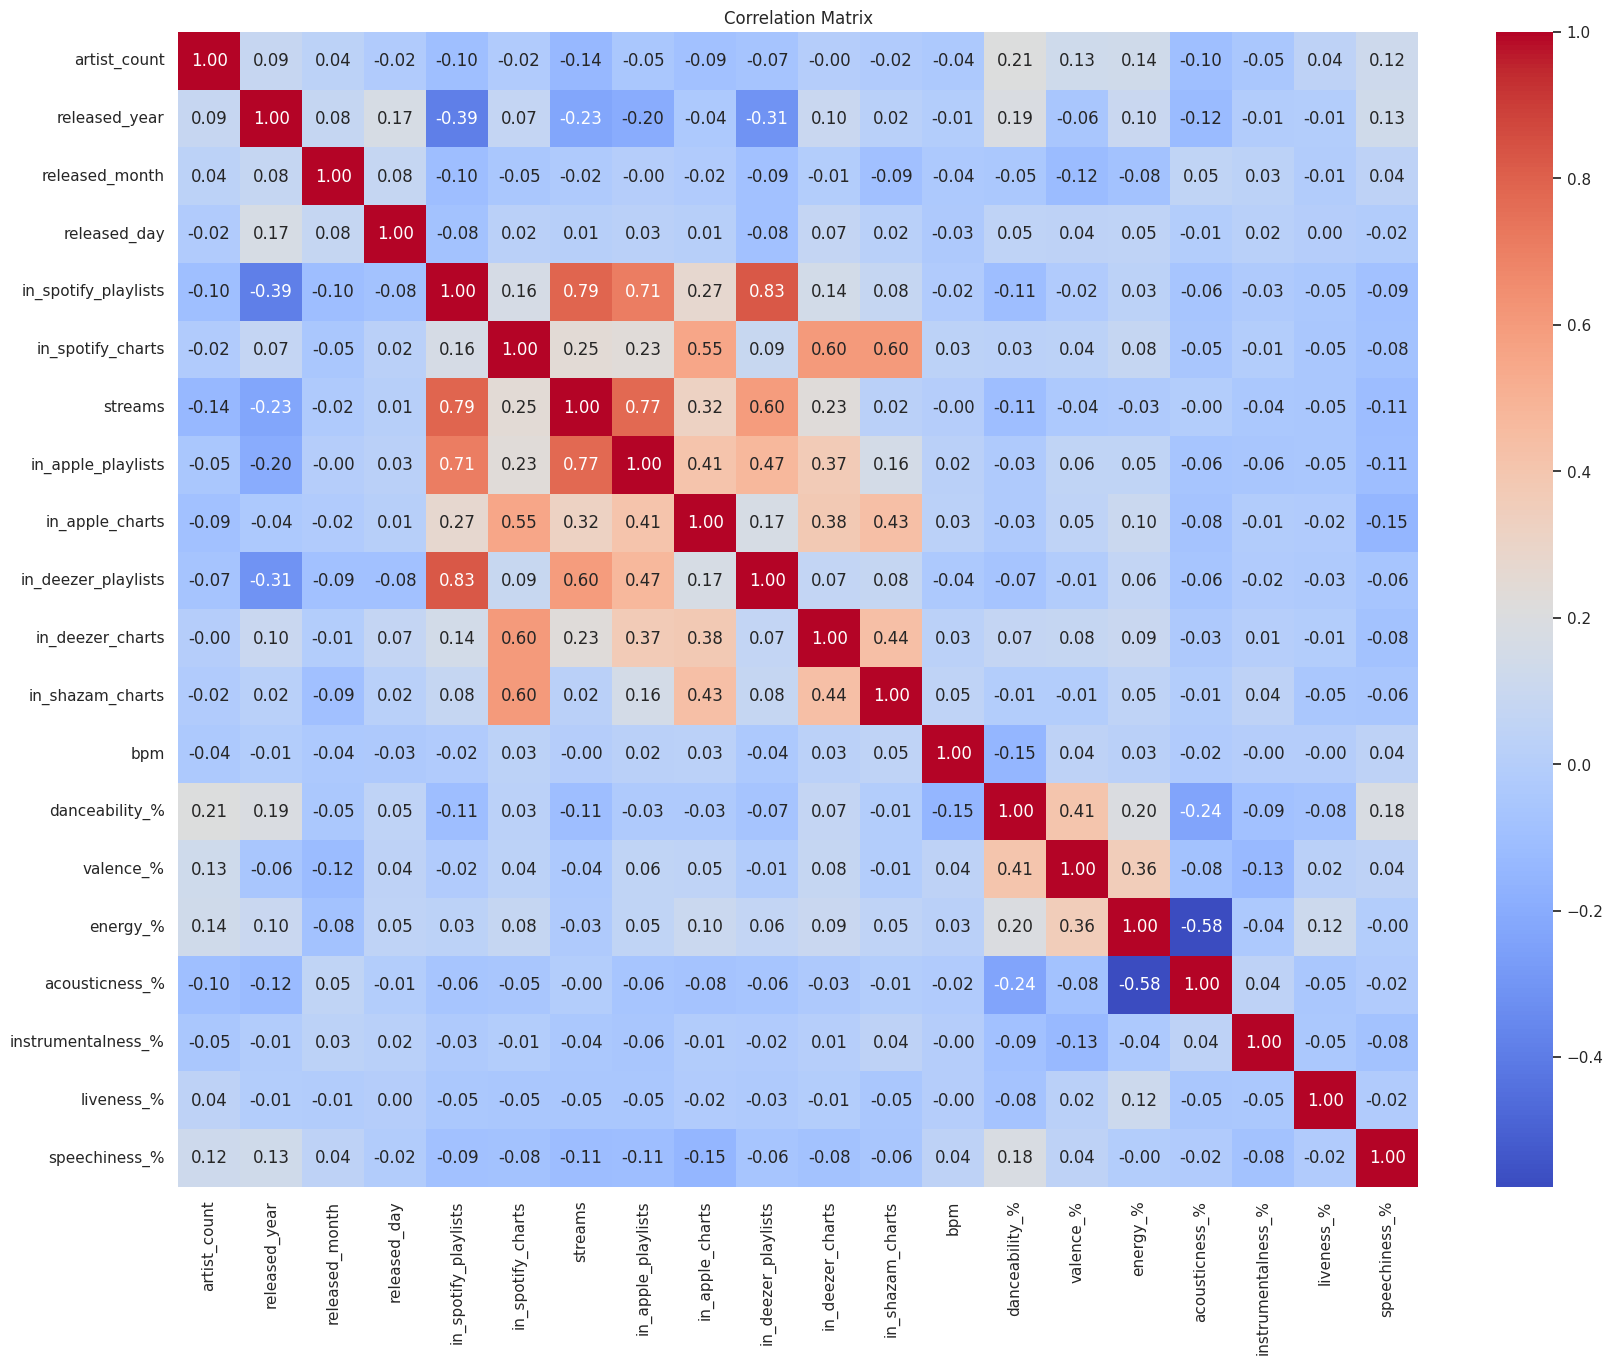

In [18]:
numerical_attributes = df[df.columns[df.dtypes != 'object']]
numerical_attributes = numerical_attributes.drop(['played', 'released_month_cat', 'streams_millions'], axis=1)
correlation_matrix = numerical_attributes.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Příprava dolovací sady
### 2 zvolené varianty jsou: 
- Popularita podle umělce a počtu umělců
- Popularita pouze podle akustiky 


Pro popularitu podle umělce a počtu umělců můžeme odstranit všechny atributy, které nemají nic společného s daným umělcem

In [19]:
artist_not_needed = df.columns[~df.columns.isin(['artist_count', 'artist(s)_name', 'streams', 'key', 'mode', 'bpm'])].tolist()
artist_df = df.drop(artist_not_needed, axis=1)
artist_df

,artist(s)_name,artist_count,streams,bpm,key,mode
0,"Latto, Jung Kook",2,141381703,125,B,Major
1,Myke Towers,1,133716286,92,C#,Major
2,Olivia Rodrigo,1,140003974,138,F,Major
3,Taylor Swift,1,800840817,170,A,Major
4,Bad Bunny,1,303236322,144,A,Minor
...,...,...,...,...,...,...
948,Selena Gomez,1,91473363,144,A,Major
949,Taylor Swift,1,121871870,166,F#,Major
950,"Feid, Paulo Londra",2,73513683,92,C#,Major
951,"Feid, Sech, Jhayco",3,133895612,97,C#,Major


Pro popularitu založenou pouze na akustice písničky můžeme odstranit všechny atributy, které nemají nic společného s rytmem písničky.

In [20]:
acoustics_not_needed = df.columns[~df.columns.isin(['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams'])].tolist()
acoustics_df = df.drop(acoustics_not_needed, axis=1)
acoustics_df

,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,141381703,125,B,Major,80,89,83,31,0,8,4
1,133716286,92,C#,Major,71,61,74,7,0,10,4
2,140003974,138,F,Major,51,32,53,17,0,31,6
3,800840817,170,A,Major,55,58,72,11,0,11,15
4,303236322,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...
948,91473363,144,A,Major,60,24,39,57,0,8,3
949,121871870,166,F#,Major,42,7,24,83,1,12,6
950,73513683,92,C#,Major,80,81,67,4,0,8,6
951,133895612,97,C#,Major,82,67,77,8,0,12,5


## Vypořádejte se s chybějícími hodnotami

### Predikční model pro `key`

In [21]:
# predikční model pro key
def fill_empty_key(df):
    df_train = df.dropna(subset=['key'])

    # Definujeme vlastnosti (X) a cílovou proměnnou (y)
    features = ['bpm', 'mode']
    target = 'key'

    X = df_train[features]
    y = df_train[target]

    # Převedeme 'mode' na numerické hodnoty pomocí one-hot encoding
    # Vytvoříme sloupcový transformátor, který aplikuje různé předzpracování na různé sloupce
    preprocessor = ColumnTransformer(
        transformers=[
            ('mode', OneHotEncoder(drop='first'), ['mode'])
        ],
        remainder='passthrough'
    )

    X = preprocessor.fit_transform(X)

    # Převedeme 'key' na numerické hodnoty pomocí label encoding
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Rozdělíme data na trénovací a testovací sady
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vytvoříme regresní model
    model = RandomForestRegressor()

    # Trénování modelu
    model.fit(X_train, y_train)

    # Vytvoříme nový DataFrame s řádky, kde chybí 'key'
    df_missing_key = df[df['key'].isnull()]

    # Použijeme natrénovaný model k predikci 'key' hodnot pro chybějící řádky
    try:
        X_missing = df_missing_key[features]
        X_missing = preprocessor.transform(X_missing)
        predicted_keys = model.predict(X_missing)

        # Převedeme predikované 'key' hodnoty zpět na původní hodnoty
        predicted_keys_labels = label_encoder.inverse_transform(predicted_keys.astype(int))

        # Přidáme chybějící hodnoty do původního datasetu
        df.loc[df['key'].isnull(), 'key'] = predicted_keys_labels
    except:
        pass
    df.isna().sum()


### Predikční model pro `in_shazam_charts`
V případě, že bychom pro naši dolovací mezodu potřebovali i hodnoty atributu `in_shazam_charts`, můžeme použít tuto metodu pro doplnění chybějících hodnot.

In [22]:
df_train = df.dropna(subset=['in_spotify_charts', 'in_shazam_charts'])

# Definujeme vlastnosti (X) a cílovou proměnnou (y)
features = ['in_spotify_charts']
target = 'in_shazam_charts'

X = df_train[features]
y = df_train[target]

# Rozdělíme data na trénovací a testovací sady
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vytvoříme regresní model
model = RandomForestRegressor()

# Trénování modelu
model.fit(X_train, y_train)

# Vytvoříme nový DataFrame s řádky, kde chybí 'in_shazam_charts'
df_missing_shazam_charts = df[df['in_shazam_charts'].isnull()]

# Použijeme natrénovaný model k predikci hodnot 'in_shazam_charts' pro chybějící řádky
X_missing = df_missing_shazam_charts[features]
# Pokud by se kód spouštěl vícekrát, může se stát, že některé hodnoty již budou nahrazeny
try:
    predicted_values = model.predict(X_missing)
    
    predicted_values_int = predicted_values.astype(int)

    # Přidáme chybějící hodnoty do původního datasetu
    df.loc[df['in_shazam_charts'].isnull(), 'in_shazam_charts'] = predicted_values_int
except:
    pass

df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
played                   0
streams_millions         1
released_month_cat       0
dtype: int64

Odstranění hodnot pro **popularitu podle umělce**

In [23]:
artist_df_dropped = artist_df.drop(rows_with_invalid_values.index, axis=0)
artist_df_dropped

,artist(s)_name,artist_count,streams,bpm,key,mode
0,"Latto, Jung Kook",2,141381703,125,B,Major
1,Myke Towers,1,133716286,92,C#,Major
2,Olivia Rodrigo,1,140003974,138,F,Major
3,Taylor Swift,1,800840817,170,A,Major
4,Bad Bunny,1,303236322,144,A,Minor
...,...,...,...,...,...,...
948,Selena Gomez,1,91473363,144,A,Major
949,Taylor Swift,1,121871870,166,F#,Major
950,"Feid, Paulo Londra",2,73513683,92,C#,Major
951,"Feid, Sech, Jhayco",3,133895612,97,C#,Major


Doplnění hodnot pro **popularitu podle umělce**

In [24]:
fill_empty_key(artist_df)
artist_df.isna().sum(), artist_df.shape

(artist(s)_name    0
 artist_count      0
 streams           1
 bpm               0
 key               0
 mode              0
 dtype: int64,
 (953, 6))

Odstranění hodnot pro **popularitu podle akustiky**

In [25]:
acoustics_df_dropped = acoustics_df.drop(rows_with_invalid_values.index, axis=0)
acoustics_df_dropped

,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,141381703,125,B,Major,80,89,83,31,0,8,4
1,133716286,92,C#,Major,71,61,74,7,0,10,4
2,140003974,138,F,Major,51,32,53,17,0,31,6
3,800840817,170,A,Major,55,58,72,11,0,11,15
4,303236322,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...
948,91473363,144,A,Major,60,24,39,57,0,8,3
949,121871870,166,F#,Major,42,7,24,83,1,12,6
950,73513683,92,C#,Major,80,81,67,4,0,8,6
951,133895612,97,C#,Major,82,67,77,8,0,12,5


Doplnění hodnot pro **popularitu podle akustiky**

In [26]:
fill_empty_key(acoustics_df)
acoustics_df.isna().sum(), acoustics_df.shape

(streams               1
 bpm                   0
 key                   0
 mode                  0
 danceability_%        0
 valence_%             0
 energy_%              0
 acousticness_%        0
 instrumentalness_%    0
 liveness_%            0
 speechiness_%         0
 dtype: int64,
 (953, 11))

Vypořádání se s odlehlými hodnotami pro **popularitu podle umělce** i **popularitu podle akustiky**

In [27]:
datasets = [artist_df_dropped, artist_df, acoustics_df_dropped, acoustics_df]
for i in datasets:
    zero_streams = i['streams'].isna()
    rows_with_weird_values = i[zero_streams]

    try:
        row_track_3 = rows_with_weird_values.iloc[0]

        i.loc[row_track_3.name, 'streams'] = 214268292
    except:
        pass

    print(i.isna().sum(), '\n')

artist(s)_name    0
artist_count      0
streams           0
bpm               0
key               0
mode              0
dtype: int64 

artist(s)_name    0
artist_count      0
streams           0
bpm               0
key               0
mode              0
dtype: int64 

streams               0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64 

streams               0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64 



Kdybychom na dolování používali název písničky, takto bychom doplnili chybějící názvy

In [28]:
fill_empty_key(df)

empty_track_name_new = df['track_name'] == ''
zero_streams = df['streams'].isna()

rows_with_weird_values = df[empty_track_name_new | zero_streams]

try:
    row_track_1 = rows_with_weird_values.iloc[0]
    row_track_2 = rows_with_weird_values.iloc[1]
    row_track_3 = rows_with_weird_values.iloc[2]

    df.loc[row_track_1.name, 'track_name'] = 'アイドル'
    df.loc[row_track_2.name, 'track_name'] = 'Shinunoga E-Wa'
    df.loc[row_track_3.name, 'streams'] = 214268292
    df.loc[row_track_3.name, 'streams_millions'] = 214268292/10**6
except:
    pass

df.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
played                  0
streams_millions        0
released_month_cat      0
dtype: int64

### Diskretizace numerických atributů

Toto by se hodilo pro datovou sadu pro **popularitu podle akustiky**

In [29]:
acoustics_dfs = [acoustics_df_dropped, acoustics_df]
for i in acoustics_dfs:
    attributes_to_discretize = i[i.columns[i.dtypes != 'object']]

    # Určete počet kategorií
    num_bins = 23

    # Diskretizace pomocí KBinsDiscretizer
    for attribute in attributes_to_discretize:
        discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform', subsample=None)
        i[attribute+'_category'] = discretizer.fit_transform(i[attribute].values.reshape(-1, 1))

    # Odstraníme původní numerické atributy
    i.drop(attributes_to_discretize, axis=1, inplace=True)

acoustics_df

,key,mode,streams_category,bpm_category,danceability_%_category,valence_%_category,energy_%_category,acousticness_%_category,instrumentalness_%_category,liveness_%_category,speechiness_%_category
0,B,Major,0,9,17,21,19,7,0,1,0
1,C#,Major,0,4,15,14,16,1,0,1,0
2,F,Major,0,11,8,6,11,4,0,6,1
3,A,Major,4,17,10,13,16,2,0,1,4
4,A,Minor,1,12,13,4,18,3,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...
948,A,Major,0,12,11,4,7,13,0,1,0
949,F#,Major,0,16,5,0,3,19,0,2,1
950,C#,Major,0,4,17,19,15,0,0,1,1
951,C#,Major,0,5,18,15,17,1,0,2,1


### Transformace kategorických atributů na numerické atributy

Zde by se naopak hodila datová sada pro **popularitu podle umělce**

In [30]:
key_map = {'A': 0, 'A#': 1, 'B': 2, 'C#': 3, 'D': 4, 'D#': 5, 'E': 6, 'F': 7, 'F#': 8, 'G': 9, 'G#': 10}

mode_map = {'Minor': 0, 'Major': 1}

In [31]:
pd.set_option('display.float_format', '{:.2f}'.format)

artist_df['key'] = artist_df['key'].map(key_map)
artist_df['mode'] = artist_df['mode'].map(mode_map)

numerical_columns = ['bpm', 'artist_count']

scaler = MinMaxScaler()
artist_df[numerical_columns] = scaler.fit_transform(artist_df[numerical_columns])

artist_df

,artist(s)_name,artist_count,streams,bpm,key,mode
0,"Latto, Jung Kook",0.14,141381703.00,0.43,2,1
1,Myke Towers,0.00,133716286.00,0.19,3,1
2,Olivia Rodrigo,0.00,140003974.00,0.52,7,1
3,Taylor Swift,0.00,800840817.00,0.74,0,1
4,Bad Bunny,0.00,303236322.00,0.56,0,0
...,...,...,...,...,...,...
948,Selena Gomez,0.00,91473363.00,0.56,0,1
949,Taylor Swift,0.00,121871870.00,0.72,8,1
950,"Feid, Paulo Londra",0.14,73513683.00,0.19,3,1
951,"Feid, Sech, Jhayco",0.29,133895612.00,0.23,3,1


In [32]:
artist_df_dropped['key'] = artist_df_dropped['key'].map(key_map)
artist_df_dropped['mode'] = artist_df_dropped['mode'].map(mode_map)

numerical_columns = ['bpm', 'artist_count']

scaler = MinMaxScaler()
artist_df_dropped[numerical_columns] = scaler.fit_transform(artist_df_dropped[numerical_columns])

artist_df_dropped

,artist(s)_name,artist_count,streams,bpm,key,mode
0,"Latto, Jung Kook",0.14,141381703.00,0.43,2,1
1,Myke Towers,0.00,133716286.00,0.19,3,1
2,Olivia Rodrigo,0.00,140003974.00,0.52,7,1
3,Taylor Swift,0.00,800840817.00,0.74,0,1
4,Bad Bunny,0.00,303236322.00,0.56,0,0
...,...,...,...,...,...,...
948,Selena Gomez,0.00,91473363.00,0.56,0,1
949,Taylor Swift,0.00,121871870.00,0.72,8,1
950,"Feid, Paulo Londra",0.14,73513683.00,0.19,3,1
951,"Feid, Sech, Jhayco",0.29,133895612.00,0.23,3,1
